Dataset preview:
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 

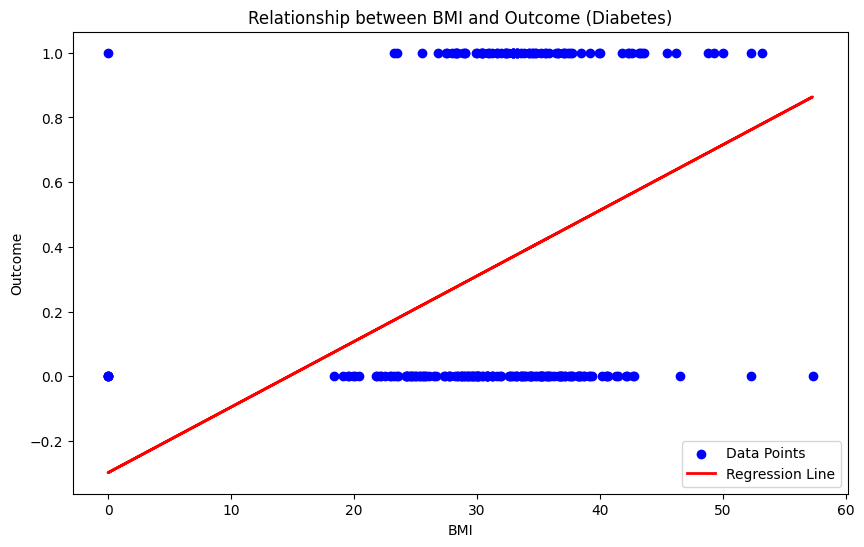

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display basic information about the dataset
print("Dataset preview:")
print(data.head())
print("\nDataset information:")
print(data.info())

# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())

# Choose a single feature for simple linear regression (e.g., 'BMI')
X = data[['BMI']]  # Independent variable
y = data['Outcome']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the intercept and coefficient of the model
print("\nRegression Intercept:", model.intercept_)
print("Regression Coefficient:", model.coef_[0])

# Calculate Residual Sum of Squares (RSS) and R-squared (R²)
rss = mean_squared_error(y_test, y_pred) * len(y_test)  # Total squared errors
r2 = r2_score(y_test, y_pred)  # R² score

# Display RSS and R² values
print("\nResidual Sum of Squares (RSS):", rss)
print("Coefficient of Determination (R²):", r2)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.title("Relationship between BMI and Outcome (Diabetes)")
plt.legend()
plt.show()
